## Importaciones

In [1]:
# cargar datos usando pandas
#data = pd.read_csv("ex2data1.txt", sep = ",", header = None)
# adicionar nombres de columnas
#columnas = ["Exam 1 score", "Exam 2 score", "Admitted"]
#data.columns = columnas
#definir variables para X y y
#X_columnas = columnas[0:-1]
#y_columnas = columnas[-1]

"""
def mapFeature(X1, X2):
    
    
    #MAPFEATURE Feature mapping function to polynomial features

    #MAPFEATURE(X1, X2) maps the two input features
    #to quadratic features used in the regularization exercise.

    #Returns a new feature array with more features, comprising of 
    #X1, X2, X1.^2, X2.^2, X1*X2, X1*X2.^2, etc..

    #Inputs X1, X2 must be the same size
    
    degree = 6
    out = np.ones(1)
   
    for i in range(1, degree + 1):
        for j in range(0, i + 1):
            out = np.append(out, ((X1**(i-j))*(X2**(j))))    
            
    return out
"""

'\ndef mapFeature(X1, X2):\n    \n    \n    #MAPFEATURE Feature mapping function to polynomial features\n\n    #MAPFEATURE(X1, X2) maps the two input features\n    #to quadratic features used in the regularization exercise.\n\n    #Returns a new feature array with more features, comprising of \n    #X1, X2, X1.^2, X2.^2, X1*X2, X1*X2.^2, etc..\n\n    #Inputs X1, X2 must be the same size\n    \n    degree = 6\n    out = np.ones(1)\n   \n    for i in range(1, degree + 1):\n        for j in range(0, i + 1):\n            out = np.append(out, ((X1**(i-j))*(X2**(j))))    \n            \n    return out\n'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import scipy.optimize as opt

## Funciones

In [3]:
def print_array(array):
    """Funcion para escribir una lista espaceada o salto de linea"""
    for a in array:
        print(" {0:5.6f}".format(a))
        

def plotData(X, y, plot_x = np.array([0., 0.]), plot_y = np.array([0., 0.])):
    """PLOTDATA Plots the data points X and y into a new figure 
    PLOTDATA(x,y) plots the data points with + for the positive examples
    and o for the negative examples. X is assumed to be a Mx2 matrix."""
    
    # encontrar los indices positivos y negativos
    pos, neg = np.where(y == 1)[0], np.where(y == 0)[0]
    
    plt.figure(figsize=(8, 8))
    plt.plot(X[pos,0],X[pos,1], "k+", markersize = 8, label = "Admitted")
    plt.plot(X[neg,0],X[neg,1], "yo", markersize = 8, label = "Not Admitted")
    
    #decision boundary
    if (np.sum(plot_x + plot_y) != 0.):
        plt.plot(plot_x, plot_y,'b--')
        plt.ylim((28, 102))
        plt.xlim((28, 102))
        
    plt.xlabel("Exam 1 score")
    plt.ylabel("Exam 2 score")
    
    plt.legend()
    
    plt.show()

def plotData1(X, y, xlabel = "Exam 1 score", ylabel = "Admitted", 
             label_pos = "Admitted", label_neg = "Not Admitted"):
    
    """PLOTDATA Plots the data points X and y into a new figure 
    PLOTDATA(x,y) plots the data points with + for the positive examples
    and o for the negative examples. X is assumed to be a Mx2 matrix."""
    
    # encontrar los indices positivos y negativos
    pos, neg = np.where(y == 1)[0], np.where(y == 0)[0]
    
    f, ax = plt.subplots(figsize=(8, 8))
    ax.plot(X[pos,0],X[pos,1], "k+", markersize = 8, label = label_pos)
    ax.plot(X[neg,0],X[neg,1], "yo", markersize = 8, label = label_neg)
    

        
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    ax.legend()
    
    return (f, ax)


def sigmoid(z):
    """SIGMOID Compute sigmoid function
       g = SIGMOID(z) computes the sigmoid of z."""
    #inicializar variables
    g = np.zeros(z.shape)    
    g = 1. / (1 + np.exp(-z))
    
    return g
    

def costFunction(theta, X, y):
    """COSTFUNCTION Compute cost and gradient for logistic regression
    J = COSTFUNCTION(theta, X, y) computes the cost of using theta as the
    parameter for logistic regression and the gradient of the cost
    w.r.t. to the parameters."""
    
    # Inicializar algunos valores utiles
    m = len(y)
    
    # inicializar variables a retornar
    J = 0.
    grad = np.zeros(theta.shape)
    
    z = np.dot(X,theta)
    h = sigmoid(z)
    J = (1./m) * ( (np.dot(-y,np.log(h))) - ((np.dot((1-y),np.log(1-h)))) )
    grad = (1./m) * np.dot(X.T,(h-y))
                  
    return (J, grad)  
                 

def J(theta, X, y):  
    """return J value"""
    return costFunction(theta, X, y)[0]

def gradient(theta, X, y): 
    """return gradient"""
    return costFunction(theta, X, y)[1] 

def plotDecisionBoundary(theta, X, y):    
    """
    PLOTDECISIONBOUNDARY Plots the data points X and y into a new figure with
    the decision boundary defined by theta PLOTDECISIONBOUNDARY(theta, X,y) 
    plots the data points with + for the positive examples and o for the negative 
    examples. X is assumed to be a either 
    1) Mx3 matrix, where the first column is an all-ones column for the intercept.
    2) MxN, N>3 matrix, where the first column is all-ones
    """
    #graficar datos
    #plotData(X[:,[1,2]], y)
    
    m, n = X.shape
    
    if n<= 3:
        # solamente se necesitan dos puntos para definir una linea, por eso escogemos los puntos finales
        plot_x = np.array([X[:,1].min() - 2, X[:,1].max() + 2 ])       
       
        # calcular la linea de decisión
        plot_y = (-1. / theta[2]) * (theta[1] * plot_x + theta[0])
        
        plotData(X[:,[1,2]], y, plot_x, plot_y)
        
    else:
        #establecer la grilla de rango
        u = np.linspace(-1., 1.5, 50)
        v = np.linspace(-1., 1.5, 50)
        
        z = np.zeros((len(u), len(v)))
        #evaluar z = theta*x sobre la grilla
        for i in range(0,len(u)):
            for j in range(0,len(v)):
                z[i,j] = mapFeature(u[i],v[j])*theta
                
        plt.contour(u, v, z)
        
def mapFeature(X1, X2, degree = 6):
    
    """
    MAPFEATURE Feature mapping function to polynomial features

    MAPFEATURE(X1, X2) maps the two input features
    to quadratic features used in the regularization exercise.

    Returns a new feature array with more features, comprising of 
    X1, X2, X1.^2, X2.^2, X1*X2, X1*X2.^2, etc..

    Inputs X1, X2 must be the same size
    """
    
    out = np.ones((X1.shape[0], 1)) 
    
    for i in range(1, degree + 1):
        for j in range(0, i + 1):
            
            val_pol = ((X1**(i-j))*(X2**(j)))
            #adicionar una columna con el valor del polinomio al final de la matriz
            out = np.hstack(( out, val_pol ))
    
    return out 


    
def predict(theta, X):
    """
    PREDICT Predict whether the label is 0 or 1 using learned logistic 
    regression parameters theta
    p = PREDICT(theta, X) computes the predictions for X using a 
    threshold at 0.5 (i.e., if sigmoid(theta'*x) >= 0.5, predict 1)
    """
    # número de ejemplos de entrenamiento
    m = X.shape[0]
   
    # vectores de probabilidades
    p = np.zeros((m,1))
    
    # asignar 0 o 1 a las probabilidades
    h = sigmoid(X@theta)  
    h = h.reshape((m,1))
    h[ h >= 0.5 ] = 1.
    h[ h < 0.5 ] = 0.
    
    p = h
    
    return p
        
    

## Ejercicio 2: Regresión Logistica
### Inicialización

In [4]:
# cargar datos numpy
data = np.loadtxt(fname = "ex2data1.txt", delimiter =",")

# crear matriz de variables y el vector de clases
X = data[:,[0,1]]
y = data[:,-1]

# tamaño de la matriz
m, n = X.shape

# redimencionar y
#y = y.reshape(m,1)

## Parte 1: Graficar

Graficar datos con + indicando (y = 1) ejemplos y o indicando (y = 0) ejemplos.



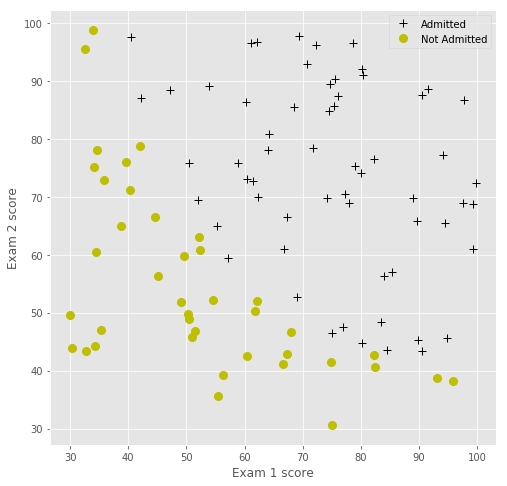

In [5]:
print("Graficar datos con + indicando (y = 1) ejemplos y o indicando (y = 0) ejemplos.\n")
plotData(X, y)



## Parte 2 : Calcular costo y gradiente

Costo inicial de theta (ceros): 
 0.693147
Costo esperado (approx):
 0.693

Gradiente inicial de thetha (ceros): 
 -0.100000
 -12.009217
 -11.262842
Gradiente esperado (approx):
 -0.1000
 -12.0092
 -11.2628


Costo del test de theta: 
 0.218330
Costo esperado (approx): 
 0.218

Gradiente del test de theta:
 0.042903
 2.566234
 2.646797
Gradiente esperado (approx):
 0.043
 2.566
 2.647


Costo de thetha por fmin_bfgs: 
 0.203498
Costo esperado (approx): 
 0.203

theta:
 -25.161333
 0.206232
 0.201472
Theta esperado(approx):
 -25.161
 0.206
 0.201



C:\Users\carlos\Anaconda3\lib\site-packages\ipykernel_launcher.py:81: RuntimeWarning: divide by zero encountered in log


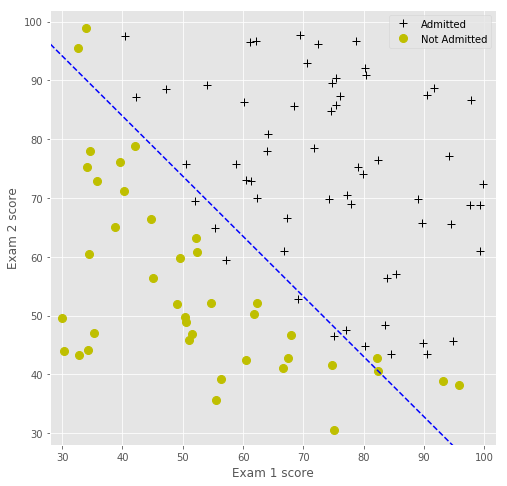

In [6]:
# adicionar columna de 1 a X
if X.shape[1] == 2:
    X = np.append(np.ones((m,1)), X, axis= 1)

# inicializar los parametros de ajuste theta
initial_theta = np.zeros(n+1)

#calcular y mostrar costo y gradiente inicial
cost, grad = costFunction(initial_theta, X, y)

print("Costo inicial de theta (ceros): \n {0:5.6f}".format(cost))

print("Costo esperado (approx):\n 0.693\n")
print("Gradiente inicial de thetha (ceros): ")
print_array(grad)
print('Gradiente esperado (approx):\n -0.1000\n -12.0092\n -11.2628\n');

# calcule y mueste el costo y el gradiente con theta diferente de cero
test_theta = np.array([-24, 0.2, 0.2])
cost, grad = costFunction(test_theta, X, y)

print("\nCosto del test de theta: \n {0:5.6f}".format(cost))
print("Costo esperado (approx): \n 0.218\n");
print("Gradiente del test de theta:");
print_array(grad)
print("Gradiente esperado (approx):\n 0.043\n 2.566\n 2.647\n");

val = opt.fmin_bfgs(J, np.array([0., 0., 0.]), fprime=gradient, args=(X, y), full_output = True, disp = False)
cost, theta = val[1], val[0]
# Print theta to screen
print("\nCosto de thetha por fmin_bfgs: \n {0:5.6f}".format(cost))
print("Costo esperado (approx): \n 0.203")
print("\ntheta:")
print_array(theta)
print("Theta esperado(approx):")
print(" -25.161\n 0.206\n 0.201\n")



plotDecisionBoundary(theta, X, y)


## Parte 4: Predicciones y precisión 

In [7]:
prob = sigmoid(np.array([1., 45., 85.]) @ theta)
print("Para un estuduante con notas 45 y 85, predecimos una probabilidad de admisión de {0:5.6f}\n".format(prob))
print("Valor esperado: 0.775 +/- 0.002\n\n")

# Compute accuracy on our training set
p = predict(theta, X)

y_aux = y.reshape((m,1))
print("Presición del enetrenamiento: {0:5.6f}\n".format( np.mean((p == y_aux)) * 100))
print("Precisión esperada (approx): 89.0\n")
#print('\n');

Para un estuduante con notas 45 y 85, predecimos una probabilidad de admisión de 0.776291

Valor esperado: 0.775 +/- 0.002


Presición del enetrenamiento: 89.000000

Precisión esperada (approx): 89.0

